<a href="https://colab.research.google.com/github/Einschong/First-repository/blob/main/Week_15_transit_fitting_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd

def box_model(times, depth, duration, t0):
    """
    Simple box model for a planet transit.

    :param times: Array of time values
    :param depth: Depth of the transit (drop in brightness)
    :param duration: Duration of the transit
    :param t0: Time of the center of the transit
    :return: Model flux values during the transit
    """
    model_flux = np.ones_like(times)
    transit = (np.abs(times - t0) <= duration / 2)
    model_flux[transit] = 1 - depth
    return model_flux

In [52]:
def download_exoplanet_data():
    # URL for the Exoplanet Archive API
    url = 'https://exoplanetarchive.ipac.caltech.edu/TAP/sync'

    # Define the query parameters for transiting exoplanets
    query = {
        "query": "select pl_name, hostname, discoverymethod, pl_orbper, pl_rade, st_teff, st_rad from ps where discoverymethod = 'Transit'",
        "format": "csv"
    }

    # Send the request to the NASA Exoplanet Archive
    response = requests.get(url, params=query)

    # Check if the request was successful
    if response.status_code == 200:
        # Save the data to a CSV file
        with open('exoplanets_data.csv', 'w') as file:
            file.write(response.text)
        print("Data downloaded and saved to exoplanets_data.csv.")
    else:
        print("Failed to retrieve data: ", response.status_code)

# Call the function to download the data
download_exoplanet_data()

Data downloaded and saved to exoplanets_data.csv.


In [53]:
data = pd.read_csv('exoplanets_data.csv')
data

,pl_name,hostname,discoverymethod,pl_orbper,pl_rade,st_teff,st_rad
0,OGLE-TR-10 b,OGLE-TR-10,Transit,3.101278,14.011,5950.00,1.17
1,Kepler-289 b,Kepler-289,Transit,NaN,2.423,5989.00,1.01
2,KOI-351 d,KOI-351,Transit,59.737144,NaN,6031.13,1.25
3,Kepler-698 b,Kepler-698,Transit,NaN,6.064,5875.00,1.59
4,Kepler-1377 b,Kepler-1377,Transit,0.740928,1.320,5618.00,0.87
...,...,...,...,...,...,...,...
32937,Kepler-1138 b,Kepler-1138,Transit,3.170600,1.700,5582.00,0.92
32938,Kepler-147 c,Kepler-147,Transit,33.416423,2.430,6012.00,1.47
32939,Kepler-586 b,Kepler-586,Transit,2.104722,2.790,5575.00,0.92
32940,Kepler-169 c,Kepler-169,Transit,6.195469,1.210,4997.00,0.76


In [54]:
planet = data.iloc[0]
# Simulated times for plotting
times = np.linspace(planet['pl_orbper'] / 2 - 0.1, planet['pl_orbper'] / 2 + 0.1, 1000)

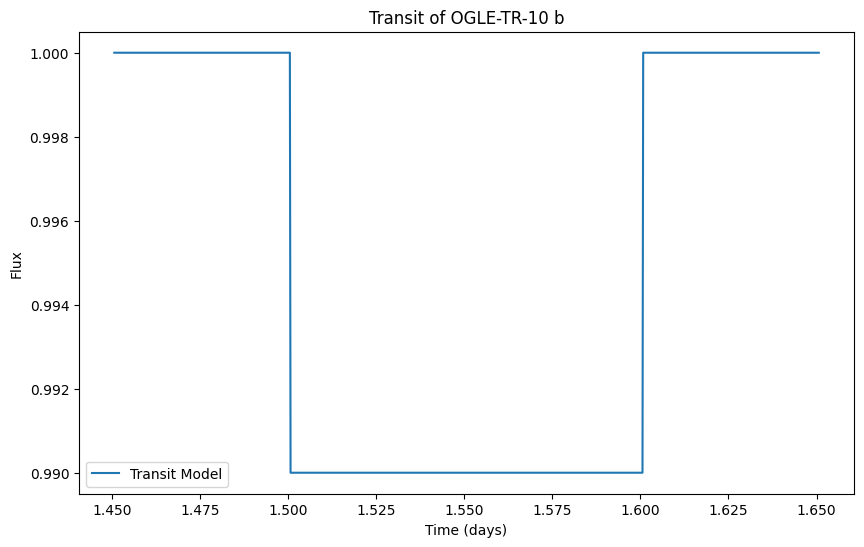

In [55]:
# Parameters for the model
depth = 0.01  # new depth of the transit
duration = 0.1  # duration in days
t0 = example_planet['pl_orbper'] / 2  # Middle of the orbit period

# Generate model data
model_flux = box_model(times, depth, duration, t0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(times, model_flux, label='Transit Model')
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.title(f'Transit of {example_planet["pl_name"]}')
plt.legend()
plt.show()


In [44]:
def reduced_chi_squared(data, model, degrees_of_freedom, sigma=noise_level):
    """
    Calculate the reduced chi-squared value.

    :param data: Observed data points
    :param model: Model data points
    :param degrees_of_freedom: Degrees of freedom, typically number of data points minus number of fitted parameters
    :param sigma: Standard deviation of errors in the data
    :return: Reduced chi-squared value
    """
    chi_squared = np.sum(((data - model) / sigma) ** 2)
    return chi_squared / degrees_of_freedom
# Varying depths and durations
depths = [0.008, 0.01, 0.012]
durations = [0.08, 0.1, 0.12]

# Dictionary to store results
results = {}

for depth in depths:
    for duration in durations:
        model_flux = box_model(times, depth, duration, t0)
        dof = len(times) - 3  # Degrees of freedom, assuming 3 parameters
        chi2_red = reduced_chi_squared(noisy_data, model_flux, dof)
        results[(depth, duration)] = chi2_red

# Print results
for params, chi2 in results.items():
    print(f"Depth: {params[0]}, Duration: {params[1]}, Reduced Chi2: {chi2:.4f}")


Depth: 0.008, Duration: 0.08, Reduced Chi2: 8.4843
Depth: 0.008, Duration: 0.1, Reduced Chi2: 2.2317
Depth: 0.008, Duration: 0.12, Reduced Chi2: 6.6968
Depth: 0.01, Duration: 0.08, Reduced Chi2: 7.4868
Depth: 0.01, Duration: 0.1, Reduced Chi2: 0.9949
Depth: 0.01, Duration: 0.12, Reduced Chi2: 7.9404
Depth: 0.012, Duration: 0.08, Reduced Chi2: 8.6236
Depth: 0.012, Duration: 0.1, Reduced Chi2: 2.4221
Depth: 0.012, Duration: 0.12, Reduced Chi2: 12.3937
